In [2]:
# Importación de las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Procesamiento y Limpieza de Datos:

In [11]:
import os

# Obtener el directorio actual del notebook
current_dir = os.getcwd()

# Construir las rutas relativas a los archivos CSV
path_2022 = os.path.join(current_dir, 'DATA/Actuaciones_limpieza_urbana_2022.csv')
path_2023 = os.path.join(current_dir, 'DATA/Actuaciones_limpieza_urbana_2023.csv')
path_2024 = os.path.join(current_dir, 'DATA/Actuaciones_limpieza_urbana_2024.csv')

# Lectura de los archivos csv
df2022 = pd.read_csv(path_2022, delimiter=';')
df2023 = pd.read_csv(path_2023, delimiter=';')
df2024 = pd.read_csv(path_2024, delimiter=';', encoding='latin-1')


In [12]:
# Añadir columna de año
df2022['Año'] = '2022'
df2023['Año'] = '2023'
df2024['Año'] = '2024'

# Concatenar los DataFrames
df_combined = pd.concat([df2022, df2023, df2024], ignore_index=True)

# Mostrar el DataFrame combinado
print(df_combined.head())

     MES  LOTE  COD_DISTRITO    DISTRITO  MUEBLES 010      \
0  ENERO     1             1     CENTRO            35.120   
1  ENERO     1             6      TETUÁN           11.960   
2  ENERO     1             7    CHAMBERÍ           11.844   
3  ENERO     2             2  ARGANZUELA           23.760   
4  ENERO     2             3      RETIRO            6.620   

   MUEBLES RECOG. PROGRAMADA   MUEBLES RECOG. EN CALLE               \
0                        7.84                                 3.090   
1                       10.76                                 1.200   
2                        3.10                                 1.316   
3                        0.00                                 0.000   
4                        0.00                                 0.000   

   Kg Recogida de muebles  RESTO              \
0                   46.05               0.00   
1                   23.92               0.00   
2                   16.26               0.00   
3             

In [13]:
df_combined.shape

(756, 38)

In [14]:
df_combined.columns

Index(['MES', 'LOTE', 'COD_DISTRITO', 'DISTRITO', 'MUEBLES 010    ',
       'MUEBLES RECOG. PROGRAMADA ', 'MUEBLES RECOG. EN CALLE             ',
       'Kg Recogida de muebles', 'RESTO            ',
       'ORGÁNICA   (HOJAS Y RAMAS)                 ', 'ENVASES         ',
       'PAPEL Y CARTÓN', 'VARIOS/RCDs CÓD DESTINO: VERLD',
       'Kg Recogida Residuos Viarios', 'Nº Servicios Barrido Manual',
       'Nº Servicios Barrido Mantenimiento', 'Nº Servicios Barrido Mecánico',
       'Nº Servicios Barrido Mixto', 'Nº Servicios Baldeo Mecánico',
       'Nº Servicios Baldeo Mixto', 'Nº Servicios Hidrolimpiador (Manchas)',
       'Nº Servicios Eliminación Grafitis', 'M2 Eliminación Grafitis',
       'Ud Reposición Bolsas Caninas', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Año'],
      dtype='object')

In [15]:
# Eliminar columnas que comienzan por 'Unnamed'

df_combined = df_combined.loc[:, ~df_combined.columns.str.contains('^Unnamed')]
df_combined.columns

Index(['MES', 'LOTE', 'COD_DISTRITO', 'DISTRITO', 'MUEBLES 010    ',
       'MUEBLES RECOG. PROGRAMADA ', 'MUEBLES RECOG. EN CALLE             ',
       'Kg Recogida de muebles', 'RESTO            ',
       'ORGÁNICA   (HOJAS Y RAMAS)                 ', 'ENVASES         ',
       'PAPEL Y CARTÓN', 'VARIOS/RCDs CÓD DESTINO: VERLD',
       'Kg Recogida Residuos Viarios', 'Nº Servicios Barrido Manual',
       'Nº Servicios Barrido Mantenimiento', 'Nº Servicios Barrido Mecánico',
       'Nº Servicios Barrido Mixto', 'Nº Servicios Baldeo Mecánico',
       'Nº Servicios Baldeo Mixto', 'Nº Servicios Hidrolimpiador (Manchas)',
       'Nº Servicios Eliminación Grafitis', 'M2 Eliminación Grafitis',
       'Ud Reposición Bolsas Caninas', 'Año'],
      dtype='object')

In [16]:
# Identificar valores nulos en las columnas y filas

df_combined.isnull().sum()

MES                                             0
LOTE                                            0
COD_DISTRITO                                    0
DISTRITO                                        0
MUEBLES 010                                    63
MUEBLES RECOG. PROGRAMADA                      63
MUEBLES RECOG. EN CALLE                        63
Kg Recogida de muebles                         63
RESTO                                          63
ORGÁNICA   (HOJAS Y RAMAS)                     64
ENVASES                                        63
PAPEL Y CARTÓN                                 63
VARIOS/RCDs CÓD DESTINO: VERLD                 63
Kg Recogida Residuos Viarios                   63
Nº Servicios Barrido Manual                    63
Nº Servicios Barrido Mantenimiento             63
Nº Servicios Barrido Mecánico                  63
Nº Servicios Barrido Mixto                     63
Nº Servicios Baldeo Mecánico                   63
Nº Servicios Baldeo Mixto                      63


In [17]:
# Eliminar filas que tengan más de tres columnas con valores nulos

df_combined = df_combined.dropna(thresh=len(df_combined.columns) - 3)
df_combined.isnull().sum()

MES                                            0
LOTE                                           0
COD_DISTRITO                                   0
DISTRITO                                       0
MUEBLES 010                                    0
MUEBLES RECOG. PROGRAMADA                      0
MUEBLES RECOG. EN CALLE                        0
Kg Recogida de muebles                         0
RESTO                                          0
ORGÁNICA   (HOJAS Y RAMAS)                     1
ENVASES                                        0
PAPEL Y CARTÓN                                 0
VARIOS/RCDs CÓD DESTINO: VERLD                 0
Kg Recogida Residuos Viarios                   0
Nº Servicios Barrido Manual                    0
Nº Servicios Barrido Mantenimiento             0
Nº Servicios Barrido Mecánico                  0
Nº Servicios Barrido Mixto                     0
Nº Servicios Baldeo Mecánico                   0
Nº Servicios Baldeo Mixto                      0
Nº Servicios Hidroli

In [18]:
# Mostrar cantidad de filas y columnas

df_combined.shape

(693, 25)

In [19]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 692
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   MES                                          693 non-null    object 
 1   LOTE                                         693 non-null    int64  
 2   COD_DISTRITO                                 693 non-null    int64  
 3   DISTRITO                                     693 non-null    object 
 4   MUEBLES 010                                  693 non-null    float64
 5   MUEBLES RECOG. PROGRAMADA                    693 non-null    float64
 6   MUEBLES RECOG. EN CALLE                      693 non-null    float64
 7   Kg Recogida de muebles                       693 non-null    float64
 8   RESTO                                        693 non-null    float64
 9   ORGÁNICA   (HOJAS Y RAMAS)                   692 non-null    float64
 10  ENVASES

In [20]:
# Cambiar nombre de las columnas para que sean más homogeneas

df_combined.columns = df_combined.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_combined.columns

Index(['mes', 'lote', 'cod_distrito', 'distrito', 'muebles_010',
       'muebles_recog._programada', 'muebles_recog._en_calle',
       'kg_recogida_de_muebles', 'resto', 'orgánica___hojas_y_ramas',
       'envases', 'papel_y_cartón', 'varios/rcds_cód_destino:_verld',
       'kg_recogida_residuos_viarios', 'nº_servicios_barrido_manual',
       'nº_servicios_barrido_mantenimiento', 'nº_servicios_barrido_mecánico',
       'nº_servicios_barrido_mixto', 'nº_servicios_baldeo_mecánico',
       'nº_servicios_baldeo_mixto', 'nº_servicios_hidrolimpiador_manchas',
       'nº_servicios_eliminación_grafitis', 'm2_eliminación_grafitis',
       'ud_reposición_bolsas_caninas', 'año'],
      dtype='object')

In [21]:
# Renombrar las siguientes columnas

df_combined = df_combined.rename(columns={
    'kg_recogida_de_muebles': 'total_kg_recogida_de_muebles',
    'resto': 'residuos_varios_viapublica_resto',
    'orgánica___hojas_y_ramas': 'orgánica_hojas_y_ramas',
    'varios/rcds_cód_destino:_verld': 'varios_residuos_de_construcción_y_demolición'
})

df_combined.columns

Index(['mes', 'lote', 'cod_distrito', 'distrito', 'muebles_010',
       'muebles_recog._programada', 'muebles_recog._en_calle',
       'total_kg_recogida_de_muebles', 'residuos_varios_viapublica_resto',
       'orgánica_hojas_y_ramas', 'envases', 'papel_y_cartón',
       'varios_residuos_de_construcción_y_demolición',
       'kg_recogida_residuos_viarios', 'nº_servicios_barrido_manual',
       'nº_servicios_barrido_mantenimiento', 'nº_servicios_barrido_mecánico',
       'nº_servicios_barrido_mixto', 'nº_servicios_baldeo_mecánico',
       'nº_servicios_baldeo_mixto', 'nº_servicios_hidrolimpiador_manchas',
       'nº_servicios_eliminación_grafitis', 'm2_eliminación_grafitis',
       'ud_reposición_bolsas_caninas', 'año'],
      dtype='object')

In [22]:
# Concatenar la columna año y mes en una nueva columna llamada "mes_año"
df_combined['mes_año'] = df_combined['mes'] + '_' + df_combined['año']

# Mostrar las primeras filas para verificar
df_combined[['mes', 'año', 'mes_año']].head()

,mes,año,mes_año
0,ENERO,2022,ENERO_2022
1,ENERO,2022,ENERO_2022
2,ENERO,2022,ENERO_2022
3,ENERO,2022,ENERO_2022
4,ENERO,2022,ENERO_2022


## Análisis explotario de datos

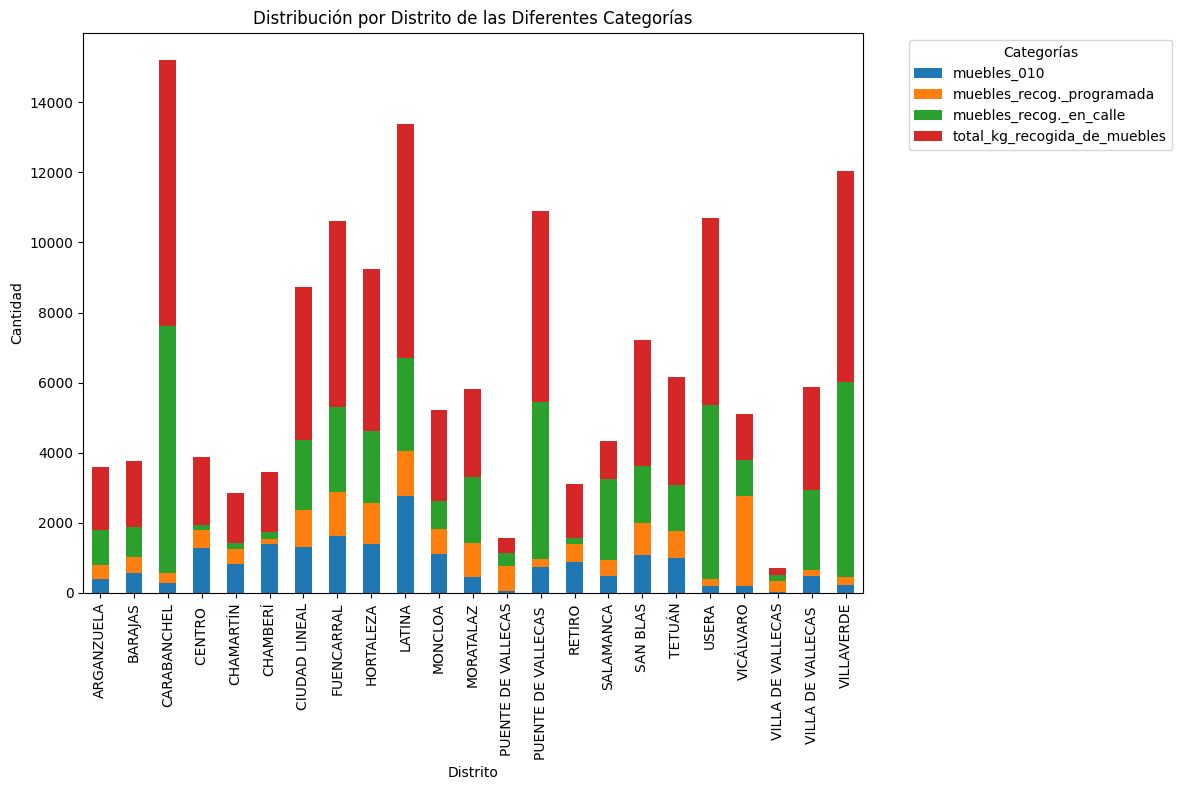

In [23]:
# Grafico para ver la cantidad de recolección de muebles por distrito

# Seleccionar las columnas relevantes para el gráfico
categorias = ['muebles_010',
       'muebles_recog._programada', 'muebles_recog._en_calle',
       'total_kg_recogida_de_muebles']

# Agrupar por distrito y sumar las categorías
df_distrito = df_combined.groupby('distrito')[categorias].sum()

# Crear el gráfico apilado
df_distrito.plot(kind='bar', stacked=True, figsize=(12, 8))

# Añadir título y etiquetas
plt.title('Distribución por Distrito de las Diferentes Categorías')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

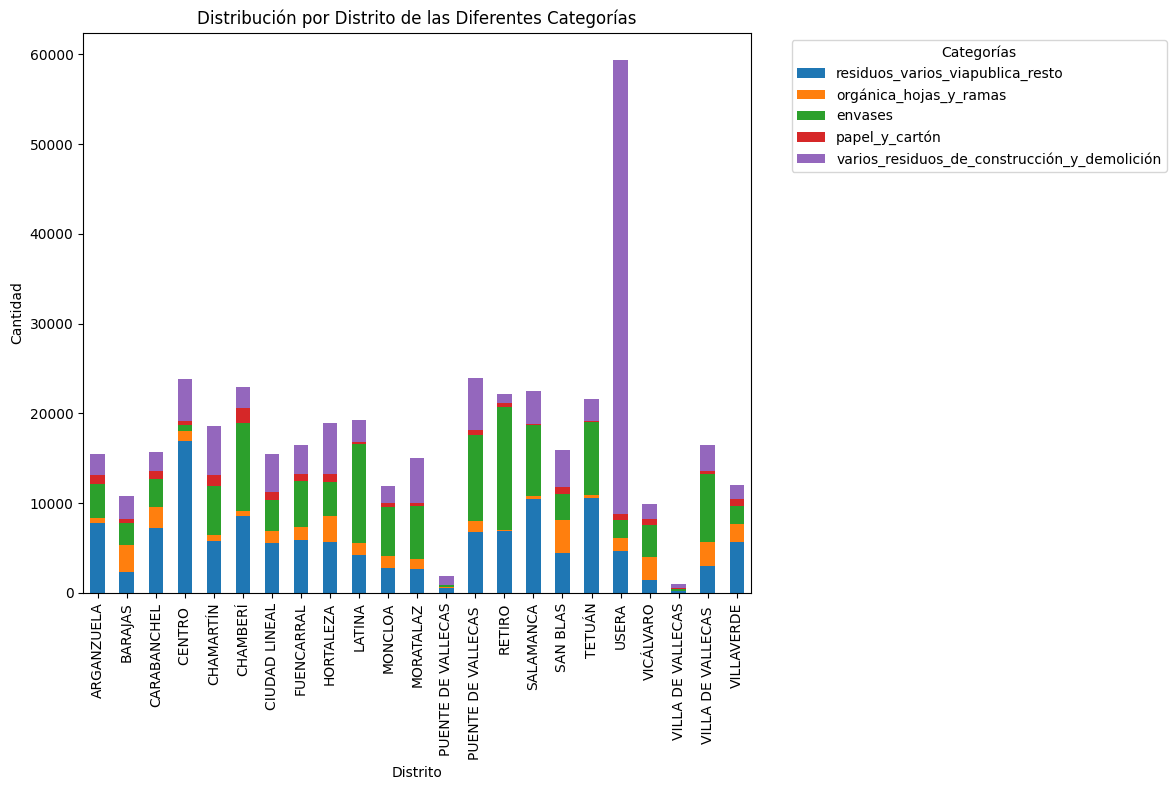

In [17]:
# Grafico para ver la cantidad de recolección de muebles por distrito

# Seleccionar las columnas relevantes para el gráfico
categorias = ['residuos_varios_viapublica_resto',
       'orgánica_hojas_y_ramas', 'envases', 'papel_y_cartón',
       'varios_residuos_de_construcción_y_demolición']

# Agrupar por distrito y sumar las categorías
df_distrito = df_combined.groupby('distrito')[categorias].sum()

# Crear el gráfico apilado
df_distrito.plot(kind='bar', stacked=True, figsize=(12, 8))

# Añadir título y etiquetas
plt.title('Distribución por Distrito de las Diferentes Categorías')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

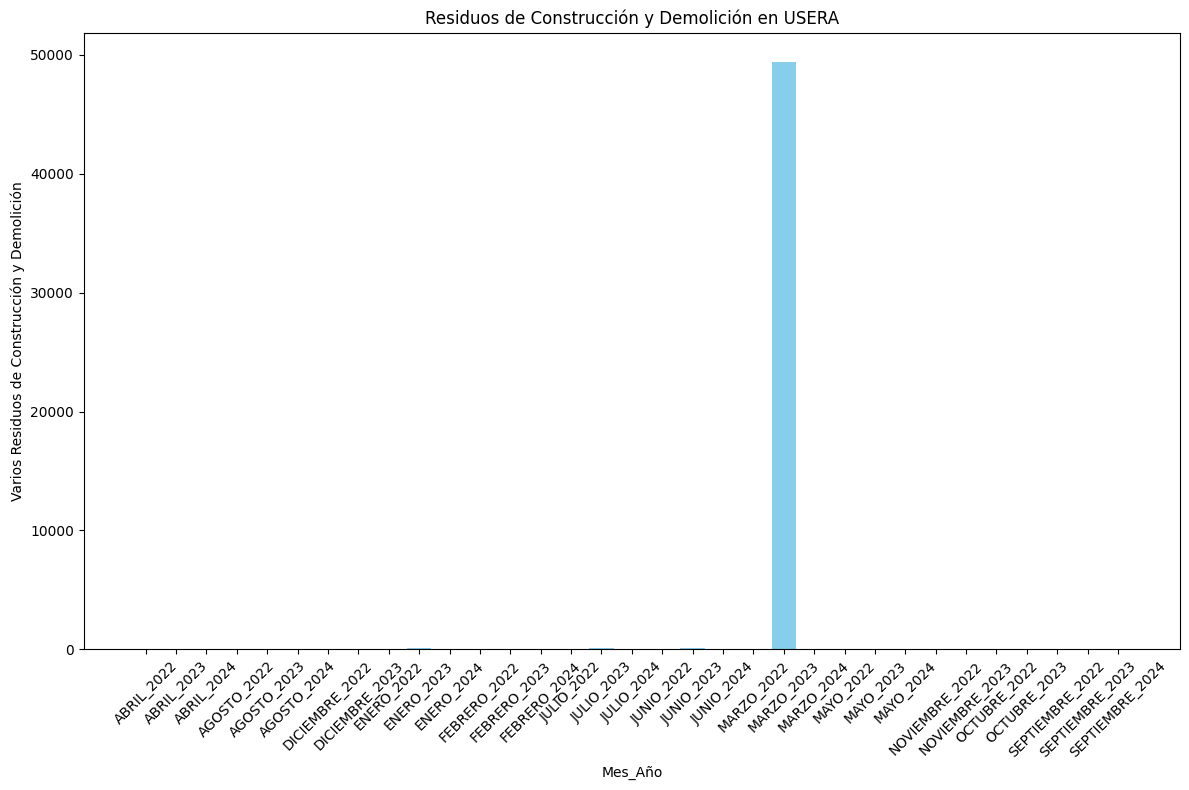

In [18]:
# Seleccionar el distrito 'USERA' y la columna "varios_residuos_de_construcción_y_demolición" y dividirlo por año_mes . Graficar eje x "año_mes" y eje y "varios_residuos_de_construcción_y_demolición"

# Seleccionar el distrito 'USERA'
df_usera = df_combined[df_combined['distrito'] == 'USERA']

# Seleccionar las columnas relevantes
df_usera = df_usera[['mes_año', 'varios_residuos_de_construcción_y_demolición']]
df_usera = df_usera.sort_values('mes_año')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_usera['mes_año'], df_usera['varios_residuos_de_construcción_y_demolición'], color='skyblue')

# Añadir título y etiquetas
plt.title('Residuos de Construcción y Demolición en USERA')
plt.xlabel('Mes_Año')
plt.ylabel('Varios Residuos de Construcción y Demolición')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

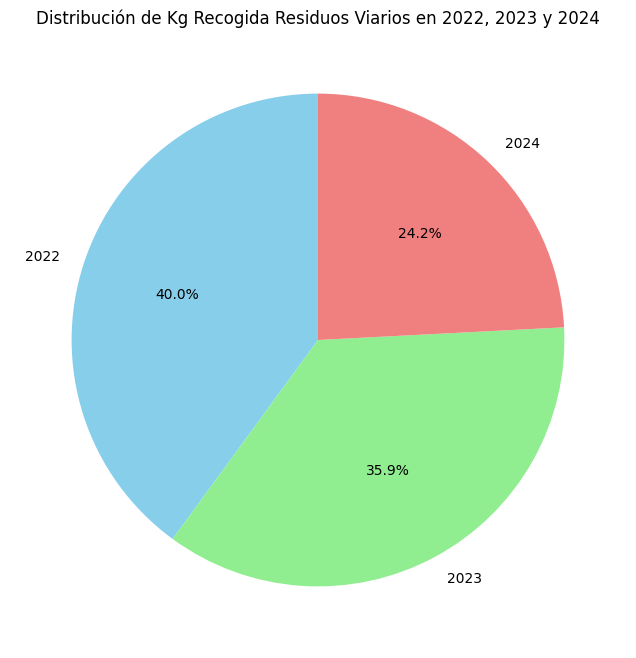

In [20]:
# Agrupar por año y sumar los kg recogidos
df_pie = df_combined.groupby('año')['kg_recogida_residuos_viarios'].sum()

# Crear el gráfico de pastel con colores diferentes para cada año
colors = ['skyblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(8, 8))
df_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Añadir título
plt.title('Distribución de Kg Recogida Residuos Viarios en 2022, 2023 y 2024')

# Mostrar el gráfico
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()

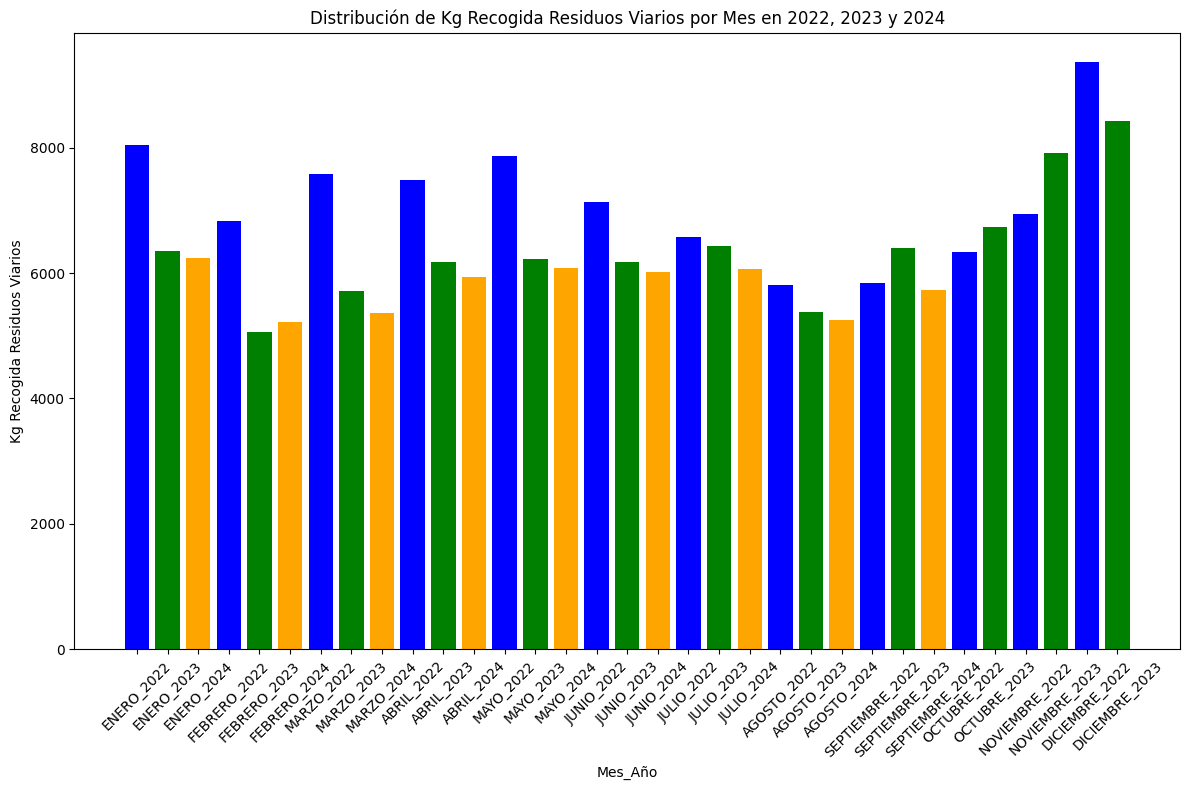

In [23]:
# Agrupar por mes y sumar los kg recogidos
df_bar = df_combined.groupby('mes_año')['kg_recogida_residuos_viarios'].sum().reset_index()

# Ordenar los datos de enero a diciembre
order = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
df_bar['mes'] = df_bar['mes_año'].str.split('_').str[0]
df_bar['año'] = df_bar['mes_año'].str.split('_').str[1]
df_bar['mes'] = pd.Categorical(df_bar['mes'], categories=order, ordered=True)
df_bar = df_bar.sort_values(['mes', 'año'])

# Crear una lista de colores para las barras
colors = ['blue' if año == '2022' else 'green' if año == '2023' else 'orange' for año in df_bar['año']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_bar['mes_año'], df_bar['kg_recogida_residuos_viarios'], color=colors)

# Añadir título y etiquetas
plt.title('Distribución de Kg Recogida Residuos Viarios por Mes en 2022, 2023 y 2024')
plt.xlabel('Mes_Año')
plt.ylabel('Kg Recogida Residuos Viarios')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Análisis temporal:
Crear una serie temporal de la cantidad de residuos recogidos por mes y año.

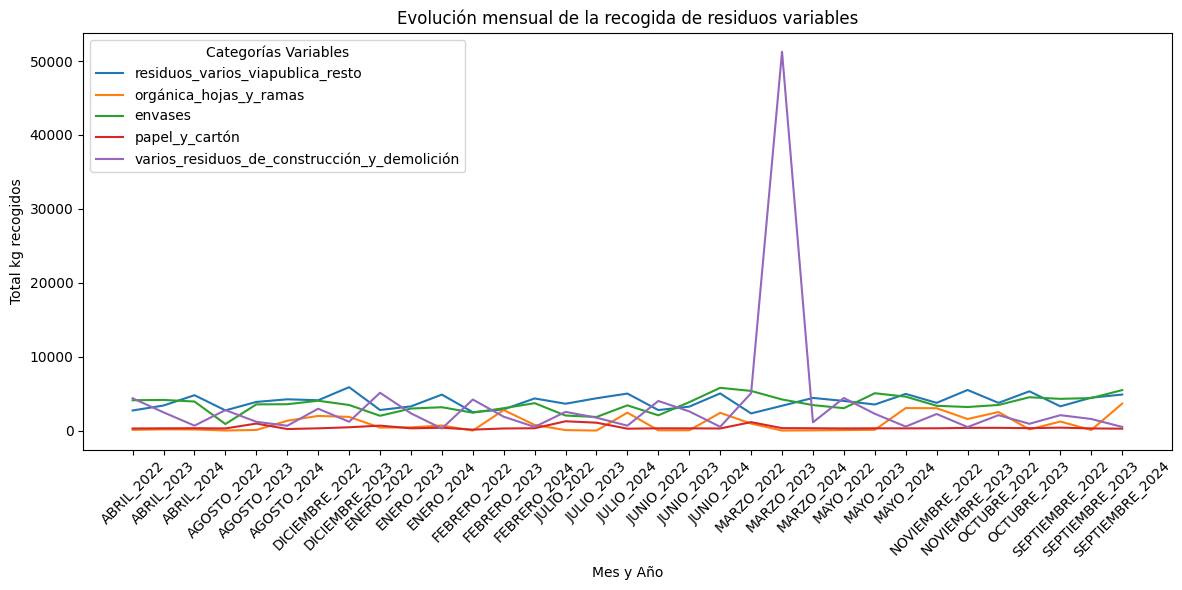

In [29]:


# Agrupar por mes_año y sumar todas las categorías de residuos variables
categorias_variables = ['residuos_varios_viapublica_resto', 'orgánica_hojas_y_ramas', 'envases', 'papel_y_cartón', 'varios_residuos_de_construcción_y_demolición']
residuos_variables_mensuales = df_combined.groupby('mes_año')[categorias_variables].sum().sort_index()

# Crear el gráfico de líneas para cada categoría de residuos variables
plt.figure(figsize=(12, 6))
for categoria in categorias_variables:
    plt.plot(residuos_variables_mensuales.index, residuos_variables_mensuales[categoria], label=categoria)

# Añadir título y etiquetas
plt.title('Evolución mensual de la recogida de residuos variables')
plt.xlabel('Mes y Año')
plt.ylabel('Total kg recogidos')
plt.xticks(rotation=45)
plt.legend(title='Categorías Variables')
plt.tight_layout()
plt.show()

## Análisis estacional:
Examinar patrones estacionales en la recogida de residuos.

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_7777/1973685031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estacionalidad_residuos = df_combined.groupby('mes')[categorias_variables].mean()


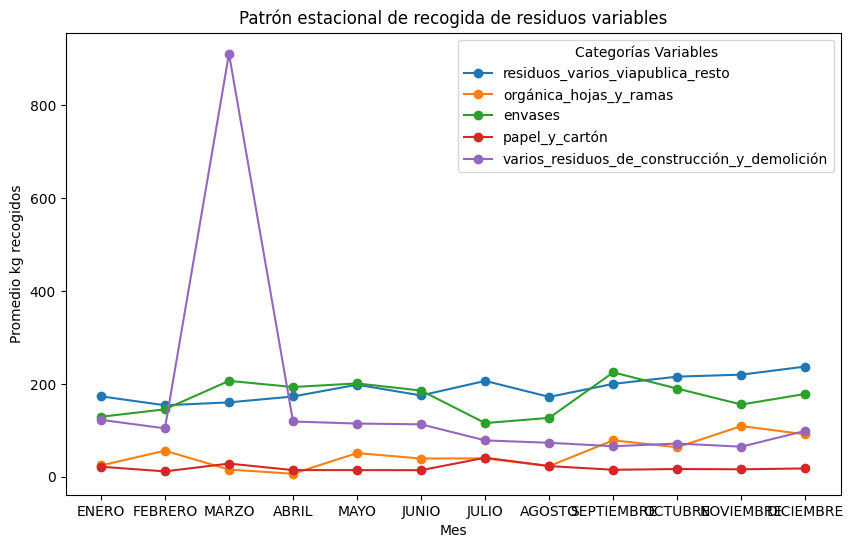

In [30]:
# Agrupar por mes y calcular la media de las categorías de residuos variables
estacionalidad_residuos = df_combined.groupby('mes')[categorias_variables].mean()

# Crear el gráfico de líneas para cada categoría de residuos variables
plt.figure(figsize=(10, 6))
for categoria in categorias_variables:
    plt.plot(estacionalidad_residuos.index, estacionalidad_residuos[categoria], marker='o', label=categoria)

# Añadir título y etiquetas
plt.title('Patrón estacional de recogida de residuos variables')
plt.xlabel('Mes')
plt.ylabel('Promedio kg recogidos')
plt.legend(title='Categorías Variables')
plt.show()


## Correlación entre variables:
Analizar la correlación entre diferentes tipos de residuos y servicios.

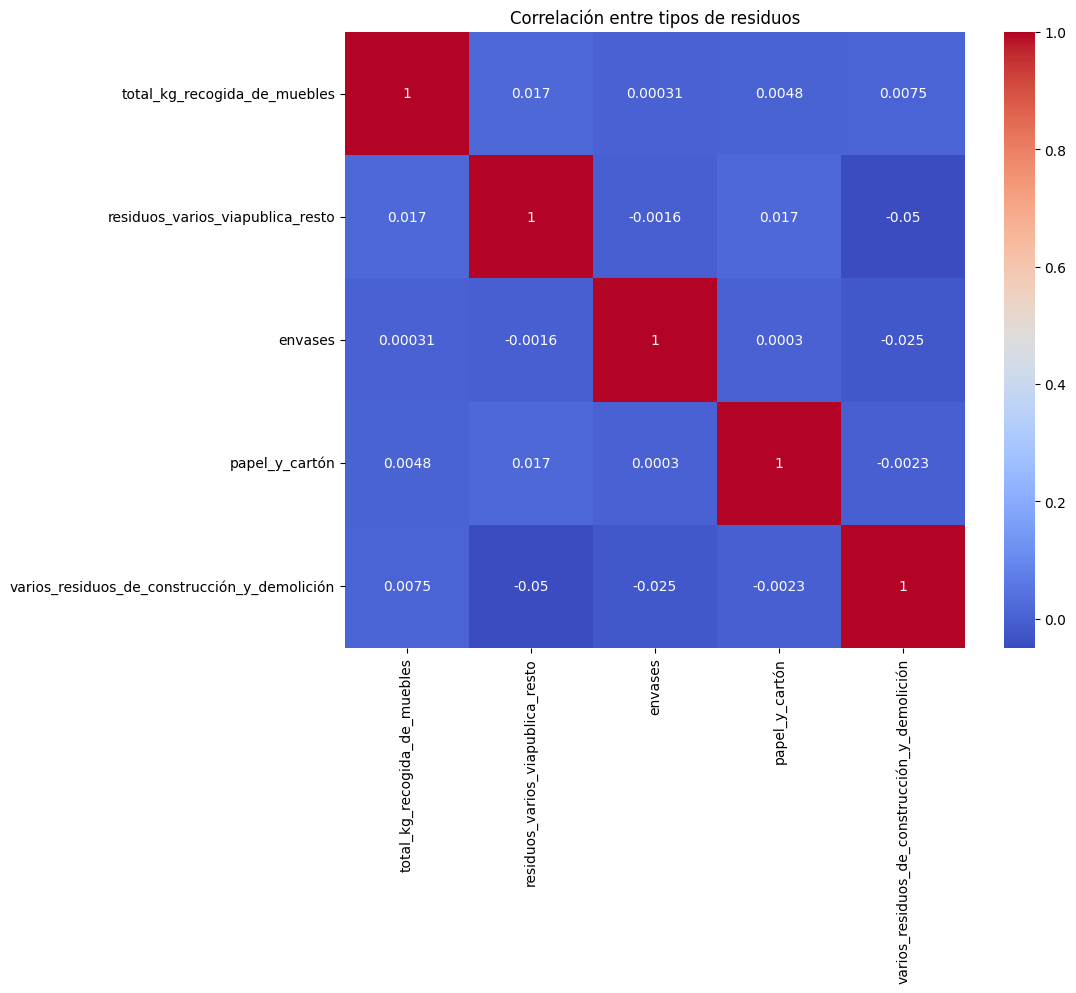

In [31]:
columnas_numericas = ['total_kg_recogida_de_muebles', 'residuos_varios_viapublica_resto', 'envases', 'papel_y_cartón', 'varios_residuos_de_construcción_y_demolición']
correlacion = df_combined[columnas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Correlación entre tipos de residuos')
plt.show()


No se observan correlaciones fuertes entre ningún par de variables, lo que sugiere que:
- La generación de cada tipo de residuo es relativamente independiente.
- No hay patrones claros de comportamiento conjunto entre los diferentes tipos de residuos.

## Análisis de eficiencia:
Calcular y visualizar la eficiencia de recogida por distrito.

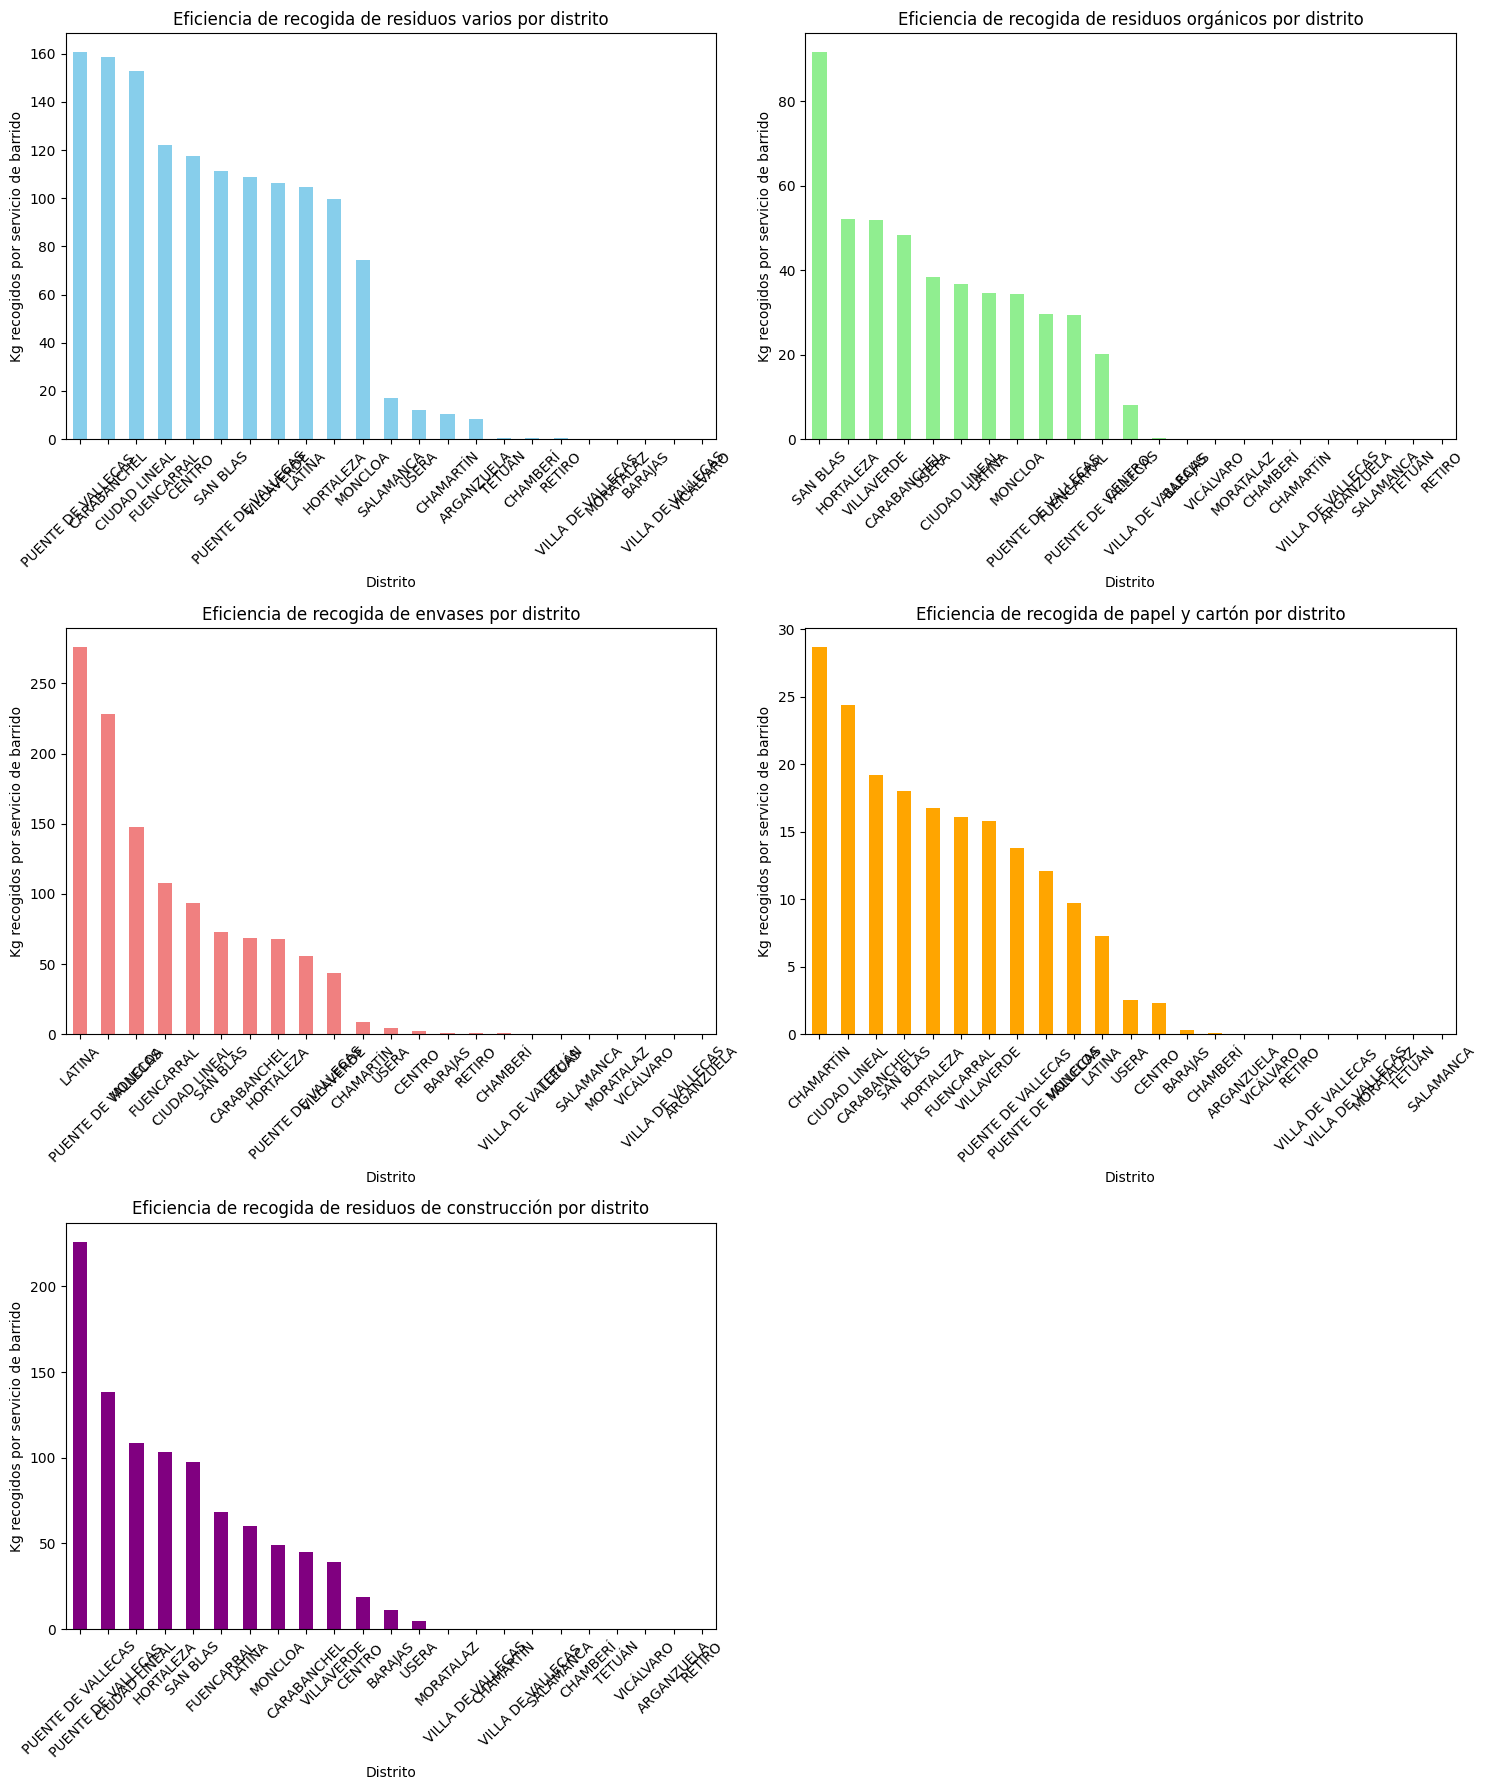

In [32]:
# Calcular la eficiencia de recogida para cada tipo de residuo
df_combined['eficiencia_residuos_varios'] = df_combined['residuos_varios_viapublica_resto'] / df_combined['nº_servicios_barrido_manual']
df_combined['eficiencia_organica'] = df_combined['orgánica_hojas_y_ramas'] / df_combined['nº_servicios_barrido_manual']
df_combined['eficiencia_envases'] = df_combined['envases'] / df_combined['nº_servicios_barrido_manual']
df_combined['eficiencia_papel_carton'] = df_combined['papel_y_cartón'] / df_combined['nº_servicios_barrido_manual']
df_combined['eficiencia_residuos_construccion'] = df_combined['varios_residuos_de_construcción_y_demolición'] / df_combined['nº_servicios_barrido_manual']

# Agrupar por distrito y calcular la media de eficiencia para cada tipo de residuo
eficiencia_por_distrito_residuos_varios = df_combined.groupby('distrito')['eficiencia_residuos_varios'].mean().sort_values(ascending=False)
eficiencia_por_distrito_organica = df_combined.groupby('distrito')['eficiencia_organica'].mean().sort_values(ascending=False)
eficiencia_por_distrito_envases = df_combined.groupby('distrito')['eficiencia_envases'].mean().sort_values(ascending=False)
eficiencia_por_distrito_papel_carton = df_combined.groupby('distrito')['eficiencia_papel_carton'].mean().sort_values(ascending=False)
eficiencia_por_distrito_residuos_construccion = df_combined.groupby('distrito')['eficiencia_residuos_construccion'].mean().sort_values(ascending=False)

# Crear gráficos de barras para cada tipo de residuo
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

eficiencia_por_distrito_residuos_varios.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Eficiencia de recogida de residuos varios por distrito')
axes[0, 0].set_xlabel('Distrito')
axes[0, 0].set_ylabel('Kg recogidos por servicio de barrido')
axes[0, 0].tick_params(axis='x', rotation=45)

eficiencia_por_distrito_organica.plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Eficiencia de recogida de residuos orgánicos por distrito')
axes[0, 1].set_xlabel('Distrito')
axes[0, 1].set_ylabel('Kg recogidos por servicio de barrido')
axes[0, 1].tick_params(axis='x', rotation=45)

eficiencia_por_distrito_envases.plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Eficiencia de recogida de envases por distrito')
axes[1, 0].set_xlabel('Distrito')
axes[1, 0].set_ylabel('Kg recogidos por servicio de barrido')
axes[1, 0].tick_params(axis='x', rotation=45)

eficiencia_por_distrito_papel_carton.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Eficiencia de recogida de papel y cartón por distrito')
axes[1, 1].set_xlabel('Distrito')
axes[1, 1].set_ylabel('Kg recogidos por servicio de barrido')
axes[1, 1].tick_params(axis='x', rotation=45)

eficiencia_por_distrito_residuos_construccion.plot(kind='bar', ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Eficiencia de recogida de residuos de construcción por distrito')
axes[2, 0].set_xlabel('Distrito')
axes[2, 0].set_ylabel('Kg recogidos por servicio de barrido')
axes[2, 0].tick_params(axis='x', rotation=45)

# Ocultar el último gráfico vacío
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()
